# Advanced Time Series Forecasting using Machine Learning

## Problem Statement

The goal of this project is to develop a robust time series forecasting model for network traffic using advanced machine learning techniques. The dataset contains hourly observations of network traffic and signal strength, along with a binary indicator of network congestion. The project is divided into two main parts: feature extraction and time series forecasting.

## Detailed Tasks

### Part 1: Feature Extraction for ML from Time Series Data

1. **Load and Explore the Dataset**
    - Load the dataset from the provided URL.
    - Explore the dataset to understand its structure and contents.

2. **Define Congestion Indicator**
    - Define a binary indicator for network congestion based on a traffic threshold.

3. **Extract Time-Based Features**
    - Convert the `timestamp` column to datetime format.
    - Extract features such as hour of the day, day of the week, and whether it is a weekend.
    - Identify peak hours and create a binary indicator for peak hours.

4. **Domain-Specific Indicators**
    - Create a binary indicator for high signal strength.
    - Create a binary indicator for high network traffic based on the defined threshold.

5. **Fourier Series Decomposition**
    - Apply Fourier series decomposition to extract cyclical patterns for the hour of the day and day of the week.

6. **Rolling Statistics**
    - Calculate rolling mean and standard deviation for network traffic over a specified window.
    - Handle NaN values generated by rolling functions.

### Part 2: Time Series Forecasting using ML Techniques

1. **Prepare Data for ARIMA Modeling**
    - Set the `timestamp` column as the index.
    - Split the data into training and testing sets.

2. **Fit ARIMA Model**
    - Fit an ARIMA model to the training data.
    - Make predictions on the test data.

3. **Evaluate ARIMA Model**
    - Plot the forecast and calculate the error.
    - Plot the forecast error.

4. **Feature Engineering for ML Models**
    - Create lagged features and time-based features.
    - Drop NaN values introduced by lagging.

5. **Train-Test Split for ML Models**
    - Define the feature set and target variable.
    - Split the data into training and testing sets.

6. **Train Random Forest Model**
    - Train a Random Forest model on the training data.
    - Make predictions on the test data.

7. **Train XGBoost Model**
    - Train an XGBoost model on the training data.
    - Make predictions on the test data.

8. **Evaluate ML Models**
    - Calculate RMSE for Random Forest and XGBoost models.
    - Plot feature importance for both models.

9. **Hyperparameter Tuning for XGBoost**
    - Define the parameter grid for GridSearchCV.
    - Perform GridSearchCV to find the best parameters.
    - Fit the XGBoost model with the best parameters and make predictions.

10. **Compare Forecasts**
     - Plot and compare forecasts from ARIMA, Random Forest, and XGBoost models.
     - Calculate and plot RMSE for all models.

11. **Conclusion**
     - Summarize the findings and performance of different models.
     - Discuss potential improvements and future work.

## Part 1: Feature Extraction for ML from Time Series Data



In the telecom domain, time series feature engineering is vital for applications like customer behavior analysis, network performance monitoring, predictive maintenance, and anomaly detection. To handle time series features effectively, feature engineering techniques should be tailored to capture temporal patterns, seasonality, and telecom-specific indicators. Here, I’ll explain how to engineer features specifically for telecom data, covering time-based features, domain-specific indicators, and handling seasonality explicitly with practical examples.

---

### 1. Create Time-Based Features

Time-based features help models capture temporal dependencies by providing information on periodic patterns within telecom data. Common time-based features include elements like hour, day of the week, month, and whether a time is during peak hours, which is especially relevant in telecom when usage patterns vary significantly by time.

#### Examples of Time-Based Features for Telecom:
1. **Hour of Day**: Telecom traffic often follows hourly trends, with higher usage during peak hours.
2. **Day of the Week**: Usage patterns on weekends vs. weekdays can be markedly different.
3. **Month/Quarter of the Year**: Seasonal events, holidays, or even marketing campaigns can affect usage patterns.
4. **Time Elapsed since Last Activity**: Useful for analyzing user engagement and detecting anomalies.




### 2. Include Domain-Specific Indicators

Domain-specific indicators provide telecom-related context to the data. These indicators can help the model learn the patterns associated with factors that directly influence network performance and user behavior.

#### Examples of Domain-Specific Indicators:
1. **Congestion Flags**: Indicate whether network traffic exceeds a certain threshold, which is useful for predicting network overloads.
2. **Signal Strength**: Measured in dBm (decibel-milliwatts), indicating the quality of the signal received.
3. **Latency**: Time delay in the network, impacting quality of service.
4. **Dropped Calls**: Number or rate of calls dropped due to poor signal or network congestion.
5. **Event or Promotion Days**: Special days when network traffic is expected to spike, such as holidays, sports events, or promotional days.
6. **Weather Data**: For outdoor cell towers, weather conditions (rain, temperature) can impact performance.


---

### 3. Handle Seasonality Explicitly

In the telecom domain, data often follows seasonal patterns, such as daily or weekly peaks in network usage, monthly customer churn trends, or seasonal promotions. Handling seasonality explicitly in feature engineering helps machine learning models understand these cyclical trends.

#### Techniques for Handling Seasonality:
1. **Fourier Series Decomposition**: Decompose time series into sine and cosine components to capture seasonal trends.
2. **Cyclic Encoding**: Encode time-based cyclical features (like hours or months) using sine and cosine transformations to account for the continuous nature of the data.
3. **Rolling Statistics**: Compute moving averages or standard deviations over specific periods (e.g., weekly) to smooth the data and capture the broader trend.



### Summary of Techniques for Telecom Time Series Feature Engineering

| Technique            | Description                                    | Example Features                          |
|----------------------|------------------------------------------------|-------------------------------------------|
| **Time-Based Features**  | Capture patterns by time intervals.             | `hour`, `day_of_week`, `is_weekend`, `is_peak_hour` |
| **Domain-Specific Indicators** | Include telecom-specific features.       | `is_congested`, `signal_strength`, `latency`, `is_event` |
| **Fourier Series & Cyclic Encoding** | Capture daily and weekly seasonality. | `hour_sin`, `hour_cos`, `day_sin`, `day_cos` |
| **Rolling Statistics**    | Smoothing and trend detection.               | `rolling_mean`, `rolling_std`            |

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Dataset Information

The dataset used in this notebook is a time series dataset related to network traffic and signal strength. It contains the following columns:

- `timestamp`: The date and time of the observation.
- `network_traffic`: The amount of network traffic at the given timestamp.
- `signal_strength`: The signal strength at the given timestamp.
- `is_congested`: A binary indicator of whether the network is congested based on a traffic threshold.

The dataset has 72 entries, with each entry representing an hourly observation.

### Data Dictionary

| Column Name       | Data Type         | Description                                                                 |
|-------------------|-------------------|-----------------------------------------------------------------------------|
| `timestamp`       | datetime64[ns]    | The date and time of the observation.                                       |
| `network_traffic` | int64             | The amount of network traffic at the given timestamp.                       |
| `signal_strength` | int64             | The signal strength at the given timestamp.                                 |
| `is_congested`    | int32             | A binary indicator of whether the network is congested (1) or not (0).      |



In [2]:
# load dataset
url="https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/refs/heads/master/datasets/Telecom/ts_network_data.csv"
data = pd.read_csv(url)
data.shape

(72, 4)

In [3]:
# Define congestion based on a traffic threshold
traffic_threshold = 400
data['is_congested'] = (data['network_traffic'] > traffic_threshold).astype(int)
# Preview the original dataset
print(data.head())

             timestamp  network_traffic  signal_strength  is_congested
0  2024-01-01 00:00:00              302              -71             0
1  2024-01-01 01:00:00              470              -73             1
2  2024-01-01 02:00:00              306              -85             0
3  2024-01-01 03:00:00              271              -61             0
4  2024-01-01 04:00:00              388              -79             0


In [4]:
# Create a new DataFrame for extracted features
df = pd.DataFrame()

# Copy the timestamp column for reference
df['timestamp'] = pd.to_datetime(data['timestamp'])


# Extract time-based features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df['is_peak_hour'] = df['hour'].apply(lambda x: 1 if 18 <= x <= 23 else 0)

df.head()

,timestamp,hour,day_of_week,is_weekend,is_peak_hour
0,2024-01-01 00:00:00,0,0,0,0
1,2024-01-01 01:00:00,1,0,0,0
2,2024-01-01 02:00:00,2,0,0,0
3,2024-01-01 03:00:00,3,0,0,0
4,2024-01-01 04:00:00,4,0,0,0


In [5]:
# Domain-specific indicators

# High signal if signal strength > -70 dBm
df['is_high_signal'] = (data['signal_strength'] > -70).astype(int) 

# High traffic if network traffic > threshold  
df['is_high_traffic'] = (data['network_traffic'] > traffic_threshold).astype(int)

df.head()


,timestamp,hour,day_of_week,is_weekend,is_peak_hour,is_high_signal,is_high_traffic
0,2024-01-01 00:00:00,0,0,0,0,0,0
1,2024-01-01 01:00:00,1,0,0,0,0,1
2,2024-01-01 02:00:00,2,0,0,0,0,0
3,2024-01-01 03:00:00,3,0,0,0,1,0
4,2024-01-01 04:00:00,4,0,0,0,0,0


In [6]:
# Fourier series decomposition for hour of the day (24-hour cycle)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df.head()

,timestamp,hour,day_of_week,is_weekend,is_peak_hour,is_high_signal,is_high_traffic,hour_sin,hour_cos
0,2024-01-01 00:00:00,0,0,0,0,0,0,0.000000,1.000000
1,2024-01-01 01:00:00,1,0,0,0,0,1,0.258819,0.965926
2,2024-01-01 02:00:00,2,0,0,0,0,0,0.500000,0.866025
3,2024-01-01 03:00:00,3,0,0,0,1,0,0.707107,0.707107
4,2024-01-01 04:00:00,4,0,0,0,0,0,0.866025,0.500000


In [7]:
# Fourier series for day of the week (7-day cycle)
df['day_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df.head()

,timestamp,hour,day_of_week,is_weekend,is_peak_hour,is_high_signal,is_high_traffic,hour_sin,hour_cos,day_sin,day_cos
0,2024-01-01 00:00:00,0,0,0,0,0,0,0.000000,1.000000,0.0,1.0
1,2024-01-01 01:00:00,1,0,0,0,0,1,0.258819,0.965926,0.0,1.0
2,2024-01-01 02:00:00,2,0,0,0,0,0,0.500000,0.866025,0.0,1.0
3,2024-01-01 03:00:00,3,0,0,0,1,0,0.707107,0.707107,0.0,1.0
4,2024-01-01 04:00:00,4,0,0,0,0,0,0.866025,0.500000,0.0,1.0


In [8]:
# Rolling statistics on network traffic
df['rolling_mean_3'] = data['network_traffic'].rolling(window=3).mean()
df['rolling_std_3'] = data['network_traffic'].rolling(window=3).std()
# Fill NaN values created by rolling functions
df.fillna(method='bfill', inplace=True)
df.head()


C:\Users\Anshu Pandey\AppData\Local\Temp\ipykernel_60328\173373320.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,timestamp,hour,day_of_week,is_weekend,is_peak_hour,is_high_signal,is_high_traffic,hour_sin,hour_cos,day_sin,day_cos,rolling_mean_3,rolling_std_3
0,2024-01-01 00:00:00,0,0,0,0,0,0,0.000000,1.000000,0.0,1.0,359.333333,95.861010
1,2024-01-01 01:00:00,1,0,0,0,0,1,0.258819,0.965926,0.0,1.0,359.333333,95.861010
2,2024-01-01 02:00:00,2,0,0,0,0,0,0.500000,0.866025,0.0,1.0,359.333333,95.861010
3,2024-01-01 03:00:00,3,0,0,0,1,0,0.707107,0.707107,0.0,1.0,349.000000,106.240294
4,2024-01-01 04:00:00,4,0,0,0,0,0,0.866025,0.500000,0.0,1.0,321.666667,60.052755


## Part 2: Time Series Forecasting using ML Techniques




### **1. Understanding Time Series Data and Forecasting Challenges**

Time series data is a sequence of data points recorded over time, often used in areas like finance, telecom, energy, and weather forecasting. However, forecasting this type of data poses several challenges, including:

- **Seasonality**: Regularly repeating patterns (e.g., monthly, daily).
- **Trend**: The overall direction in the data (e.g., increasing, decreasing).
- **Noise**: Irregularities that don’t follow patterns.
- **Autocorrelation**: The relationship of a time series with its past values.

Forecasting models must handle these complexities to deliver accurate predictions. This is where advanced techniques like Random Forest and XGBoost can be highly effective, as they capture non-linear dependencies and can handle noise better than traditional models.

---

### **2. Why Use Machine Learning for Time Series Forecasting?**

Traditional methods assume linear relationships and work well with stationary data. However, real-world data often has complex patterns, seasonal shifts, and non-linear dependencies. Machine learning techniques like Random Forest and XGBoost have key advantages:

- **Non-Linearity**: They can capture non-linear relationships without manual intervention.
- **Feature Handling**: Capable of handling numerous features and can incorporate external factors.
- **Robustness to Noise**: Less sensitive to noise due to their ensemble nature.

In [9]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

### Dataset Information

The dataset used in this notebook is a time series dataset related to network traffic and signal strength. It contains the following columns:

- `timestamp`: The date and time of the observation.
- `network_traffic`: The amount of network traffic at the given timestamp.
- `signal_strength`: The signal strength at the given timestamp.
- `is_congested`: A binary indicator of whether the network is congested based on a traffic threshold.

The dataset has 72 entries, with each entry representing an hourly observation.

### Data Dictionary

| Column Name       | Data Type         | Description                                                                 |
|-------------------|-------------------|-----------------------------------------------------------------------------|
| `timestamp`       | datetime64[ns]    | The date and time of the observation.                                       |
| `network_traffic` | int64             | The amount of network traffic at the given timestamp.                       |
| `signal_strength` | int64             | The signal strength at the given timestamp.                                 |
| `is_congested`    | int32             | A binary indicator of whether the network is congested (1) or not (0).      |

In [20]:
# Load Dataset
url = "https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/refs/heads/master/datasets/Telecom/ts_network_traffice_dataset2.csv"
df = pd.read_csv(url)

df.head()


,timestamp,network_traffic
0,2024-01-01 00:00:00,229
1,2024-01-01 01:00:00,269
2,2024-01-01 02:00:00,412
3,2024-01-01 03:00:00,288
4,2024-01-01 04:00:00,482


In [21]:
# Prepare the data for ARIMA modeling
# We will use the 'network_traffic' column from the original dataset 'data'
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
network_traffic = data['network_traffic']

In [22]:
# Split the data into train and test sets
train_size = int(len(network_traffic) * 0.8)
train, test = network_traffic[:train_size], network_traffic[train_size:]


In [23]:
# Fit the ARIMA model
# We will use a simple ARIMA(4,1,0) model for demonstration purposes
model = ARIMA(train, order=(4, 1, 0))
model_fit = model.fit()

# Make predictions
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fit.predict(start=start, end=end, typ='levels')

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


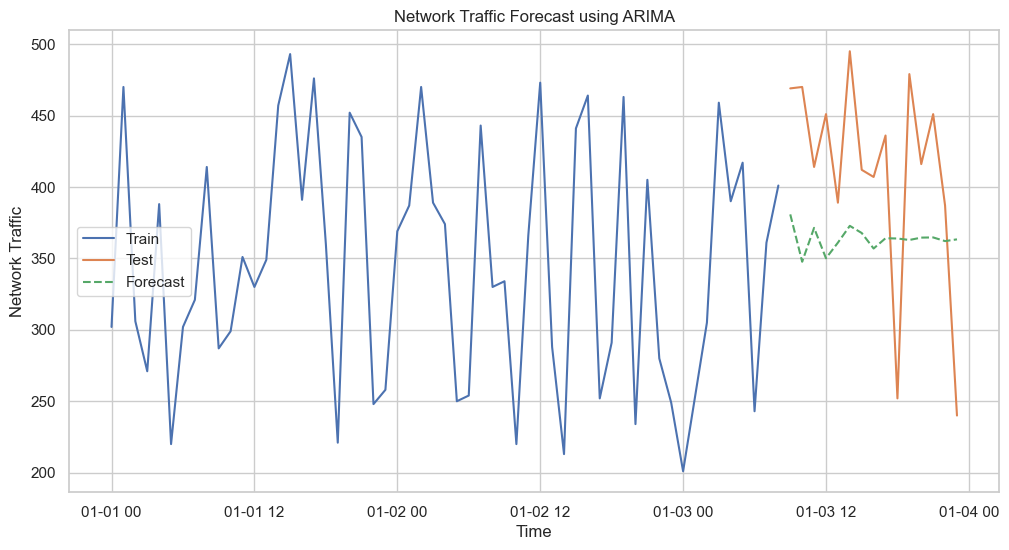

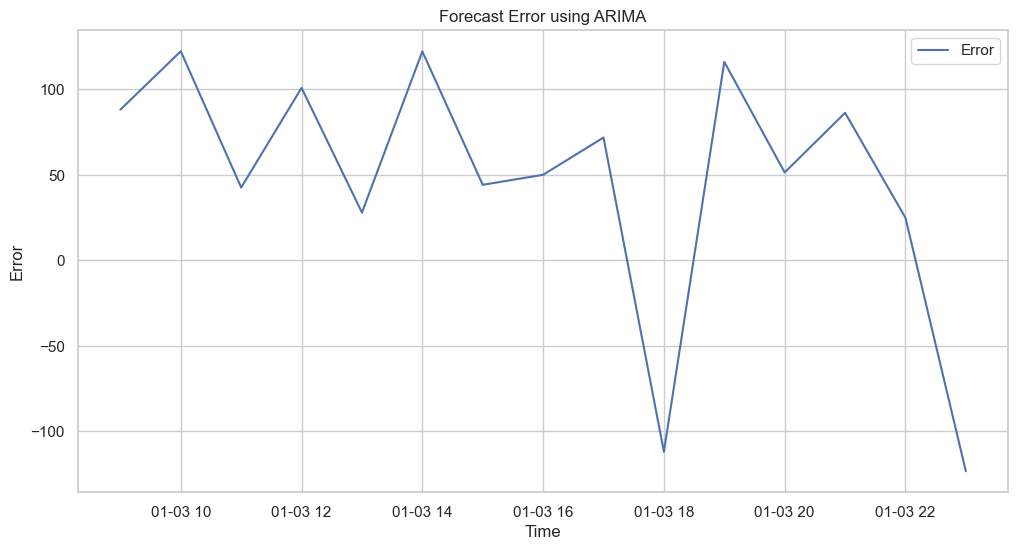

In [ ]:
# Plot the forecast and error
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Forecast', linestyle='--')
plt.legend()
plt.title('Network Traffic Forecast using ARIMA')
plt.xlabel('Time')
plt.ylabel('Network Traffic')
plt.show()

# Calculate and plot the error
error = test - predictions
plt.figure(figsize=(12, 6))
plt.plot(error, label='Error')
plt.legend()
plt.title('Forecast Error using ARIMA')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()

#### **Feature Engineering Techniques**

Feature engineering for time series often involves creating **lagged variables** (past values of the target variable) and **window features** (rolling statistics).

1. **Lag Features**: Include values from previous time steps (e.g., `lag_1`, `lag_7`).
2. **Rolling Statistics**: Calculate moving averages, standard deviation, and other statistics over a rolling window (e.g., `rolling_mean_7`).
3. **Seasonal Decomposition**: Decompose time series into trend, seasonality, and residuals as separate features.
4. **Date/Time Features**: Extract useful information such as the hour of the day, day of the week, and month.



In [27]:
# Load Dataset
url = "https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/refs/heads/master/datasets/Telecom/ts_network_traffice_dataset2.csv"
df = pd.read_csv(url)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()


,timestamp,network_traffic
0,2024-01-01 00:00:00,229
1,2024-01-01 01:00:00,269
2,2024-01-01 02:00:00,412
3,2024-01-01 03:00:00,288
4,2024-01-01 04:00:00,482


In [32]:
# Create lagged features
df['lag_1'] = df['network_traffic'].shift(1)
df['lag_24'] = df['network_traffic'].shift(24) # Same hour, previous day
df.head()

,timestamp,network_traffic,hour,day_of_week,is_weekend,lag_1,lag_24
0,2024-01-01 00:00:00,229,0,0,0,NaN,NaN
1,2024-01-01 01:00:00,269,1,0,0,229.0,NaN
2,2024-01-01 02:00:00,412,2,0,0,269.0,NaN
3,2024-01-01 03:00:00,288,3,0,0,412.0,NaN
4,2024-01-01 04:00:00,482,4,0,0,288.0,NaN


In [30]:
# Time-based features
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
# Drop NaN values introduced by lagging
df.dropna(inplace=True)
df.head()

,timestamp,network_traffic,hour,day_of_week,is_weekend
0,2024-01-01 00:00:00,229,0,0,0
1,2024-01-01 01:00:00,269,1,0,0
2,2024-01-01 02:00:00,412,2,0,0
3,2024-01-01 03:00:00,288,3,0,0
4,2024-01-01 04:00:00,482,4,0,0


In [36]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(216, 7)
(216, 7)


In [37]:
# Define feature set and target variable & split data into train and test set
X, y = df[['lag_1', 'lag_24', 'hour', 'day_of_week', 'is_weekend']], df['network_traffic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **3. Forecasting with Random Forest and XGBoost**

### Random Forest: Concept, Explanation, and Theoretical Approach

**Introduction**  
Random Forest is an ensemble learning method for classification and regression, utilizing multiple decision trees and combining them for enhanced accuracy. It leverages two main techniques: Bagging (Bootstrap Aggregating) and Random Feature Selection.

#### Key Concepts

1. **Ensemble Learning**: Combining multiple decision trees to form a "forest," reducing individual tree biases and overall variance for a more generalized model.
2. **Bagging (Bootstrap Aggregating)**: Randomly samples subsets of data with replacement to train each decision tree on a unique subset. Predictions from these trees are averaged (regression) or voted (classification) to minimize variance.
3. **Random Feature Selection**: At each node, a random subset of features is selected to determine the best split. This decorrelates trees and reduces overfitting, since trees don’t depend on the same dominant features.

#### Theoretical Foundation

1. **Bias-Variance Tradeoff**: Random Forest reduces variance without significantly increasing bias by averaging the outputs of many decision trees, which individually may have high variance.
2. **Bootstrap Sampling (Bagging)**: Each tree is trained on a bootstrapped subset, with approximately one-third of data excluded in each subset. Aggregating predictions from these varied subsets minimizes overfitting.
3. **Random Feature Selection at Nodes**: Only a random subset of features is considered at each node split, reducing tree correlation and preventing the model from being overly reliant on specific features.

#### Working of Random Forest

1. **Random Sampling (Bagging)**: From \( N \) observations, bootstrap samples are drawn and used to train individual decision trees.
2. **Tree Construction**: For each node, a random subset of features is selected, and the best split is determined using impurity measures (e.g., Gini index or variance).
3. **Voting and Aggregation**: For classification, trees vote on the class label, while regression predictions are averaged across trees.

#### Out-of-Bag (OOB) Error Estimation

Each tree is trained on a subset, with approximately one-third of the data left out (OOB samples). OOB error is calculated by evaluating these samples, providing an in-built cross-validation measure without separate validation data.

#### Feature Importance

Random Forest models provide feature importance by two main methods:
1. **Gini Importance (Mean Decrease Impurity)**: Measures reduction in impurity (Gini index) across all trees.
2. **Permutation Importance (Mean Decrease Accuracy)**: Measures decrease in accuracy when feature values are randomly permuted, indicating the importance of the feature based on accuracy drop.

#### Hyperparameters

Key hyperparameters for tuning Random Forest include:
- **Number of Trees (n_estimators)**: Controls the number of trees in the forest.
- **Max Depth**: Limits how deep each tree can grow.
- **Min Samples Split/Leaf**: Controls minimum sample requirements for node splitting.
- **Max Features**: Limits the number of features considered at each split, introducing randomness for reduced overfitting. 

Random Forest’s structure of combining bootstrap sampling, random feature selection, and decision trees offers a reliable, low-variance approach suited to both classification and regression.

In [38]:
# Train Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

### XGBoost: Concept, Explanation, and Theoretical Approach

**Introduction**  
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting developed by Tianqi Chen. Known for its high performance, scalability, and flexibility, XGBoost is widely used in competitive machine learning tasks. XGBoost builds decision trees in a sequential manner, where each new tree attempts to correct errors made by previous trees. It enhances traditional gradient boosting by incorporating regularization techniques, efficient tree pruning, and parallelization, which together increase both its accuracy and efficiency.

#### Key Concepts of XGBoost

1. **Gradient Boosting**: XGBoost is based on gradient boosting, where an ensemble of weak learners (typically decision trees) is built sequentially. Each tree corrects the residual errors from the previous ones, gradually improving overall model performance. Trees are added iteratively, and each tree focuses on reducing the residuals (errors) of the previous trees.

2. **Regularization**: XGBoost introduces \( L_1 \) (Lasso) and \( L_2 \) (Ridge) regularization penalties to control model complexity. This regularization term penalizes complex models, preventing overfitting by encouraging simpler, more generalizable trees.

3. **Tree Pruning (Shrinkage and Stopping Criteria)**: XGBoost incorporates pruning techniques, such as limiting the maximum depth of each tree and applying minimum split conditions, to avoid overly deep trees. Shrinkage (or learning rate) controls the contribution of each tree by scaling it down, improving generalization.

4. **Parallel Processing**: Unlike traditional boosting algorithms, XGBoost is optimized for parallel computation. While building trees sequentially, XGBoost allows for the simultaneous evaluation of splits at each tree level, accelerating the training process.

#### Theoretical Foundation of XGBoost

1. **Objective Function**  
   The objective function of XGBoost comprises two main parts:

   - **Training Loss**: Measures how well the model fits the training data. For regression, a typical choice is Mean Squared Error, while for classification, it’s often log loss.
   - **Regularization Term**: Controls the complexity of the model by penalizing the number and magnitude of leaf weights in the trees. This prevents overfitting by adding a regularization term to the loss function.

   
2. **Gradient Descent and Taylor Expansion**  
   XGBoost uses gradient boosting, where the model is improved by minimizing the residual errors. To achieve this, XGBoost approximates the objective function using a second-order Taylor expansion, which includes both first-order (gradient) and second-order (Hessian) derivatives of the loss function with respect to the model's predictions. The second-order approximation improves the model's optimization process by enabling more accurate adjustments in each step.

3. **Additive Model**  
   XGBoost constructs its model in an additive manner. At each iteration \( t \), a new function \( f_t(x) \) is added to minimize the objective function. 
   
#### Working of XGBoost

1. **Initialization**  
   XGBoost begins by initializing predictions with a constant, typically the average of the target variable for regression or a probability threshold for classification.

2. **Building Trees Iteratively**  
   For each iteration:
   - **Compute Residuals**: Calculate the residuals, which are the differences between the actual and predicted values.
   - **Optimize Leaf Weights**: Using a second-order Taylor expansion, determine optimal weights for each leaf by computing gradients and Hessians. These values guide how much each leaf should contribute to correcting the residuals.
   - **Regularization**: Apply regularization penalties to control the size and weight distribution within each leaf, reducing overfitting and ensuring smoother predictions.

3. **Tree Construction**  
   Trees in XGBoost are built level-wise, meaning that the algorithm grows each level of the tree simultaneously, enhancing parallelism and computational efficiency.

   - **Split Finding**: For each node, XGBoost evaluates potential split points based on a criterion such as Gain, which measures the reduction in impurity (e.g., Gini or entropy). The split with the highest gain is chosen.
   - **Pruning**: Trees are pruned when additional splits do not improve the objective function by a predefined threshold, known as the minimum split loss (or gamma). This prevents excessive branching.

4. **Shrinkage (Learning Rate)**  
   Each tree’s contribution is scaled by a learning rate \( \eta \), which controls the degree to which each tree corrects the residuals. A smaller learning rate (e.g., 0.1 or 0.01) usually improves generalization but requires more trees to achieve optimal performance.

#### Regularization in XGBoost

XGBoost uses a combination of \( L_1 \) and \( L_2 \) regularization on leaf weights, with the following regularization terms:

1. **\( L_1 \) Regularization**: Encourages sparsity by shrinking some leaf weights to zero, effectively reducing tree complexity.
2. **\( L_2 \) Regularization**: Controls the magnitude of leaf weights to avoid extreme values, making the model less sensitive to small data variations.

The regularization term in the objective function penalizes complex trees, helping maintain a balance between model fit and complexity.

#### Advanced Techniques in XGBoost

1. **Handling Missing Values**  
   XGBoost is designed to handle missing data by learning "default directions" in splits. If a data point is missing a value for a feature, it is assigned to the direction that minimizes the loss function, allowing the model to remain robust to missing values.

2. **Weighted Quantile Sketching**  
   XGBoost uses a specialized algorithm known as Weighted Quantile Sketching to handle large datasets. This technique efficiently finds the best split points by approximating quantiles, which is faster than traditional sorting methods used in other tree algorithms.

3. **Parallel Processing**  
   XGBoost leverages parallelization within each tree by evaluating possible splits concurrently at each level. This significantly improves computational speed, especially on large datasets, without impacting the sequential nature of boosting.

#### Hyperparameters in XGBoost

Key hyperparameters in XGBoost include:

1. **Learning Rate (eta)**: Controls the contribution of each tree. Smaller values improve generalization but require more trees.
2. **Max Depth**: Limits the depth of each tree, reducing overfitting in complex datasets.
3. **Min Child Weight**: Sets the minimum sum of instance weights required to make a further split, controlling overfitting by preventing overly specific splits.
4. **Gamma (Min Split Loss)**: The minimum loss reduction required for a split to be added. Larger values result in more conservative trees.
5. **Subsample**: The fraction of the data randomly sampled to grow each tree. Lower values introduce randomness, preventing overfitting.
6. **Colsample_bytree, Colsample_bylevel, Colsample_bynode**: Control the fraction of features sampled at each tree, level, or node split, respectively.

In [39]:
# Train XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)


In [40]:


# Evaluate Models
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")


Random Forest RMSE: 100.69866096654188
XGBoost RMSE: 113.24135847153497


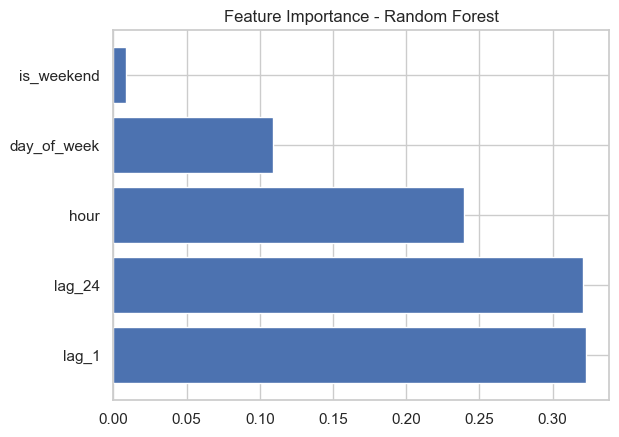

In [41]:
import matplotlib.pyplot as plt
# Feature importance for Random Forest
plt.barh(X.columns, rf_model.feature_importances_)
plt.title('Feature Importance - Random Forest')
plt.show()


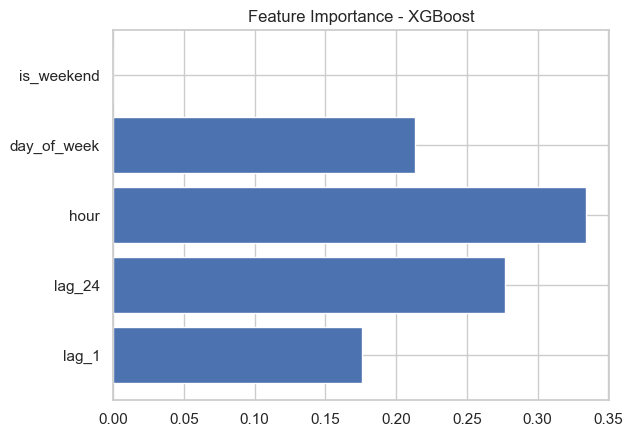

In [42]:
# Feature importance for XGBoost
plt.barh(X.columns, xgb_model.feature_importances_)
plt.title('Feature Importance - XGBoost')
plt.show()


In [43]:

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [44]:
# Initialize the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_score}")

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best RMSE: 82.74371798939379


In [46]:
# Use the best parameters to fit the XGBoost model
best_xgb_model = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
best_xgb_model.fit(X_train, y_train)

# Make predictions
best_xgb_preds = best_xgb_model.predict(X_test)



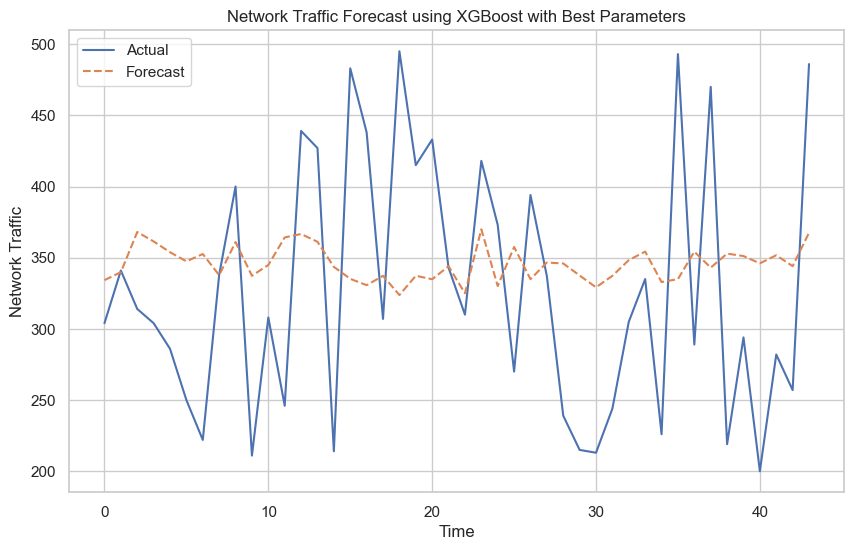

In [47]:
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(best_xgb_preds, label='Forecast', linestyle='--')
plt.legend()
plt.title('Network Traffic Forecast using XGBoost with Best Parameters')
plt.xlabel('Time')
plt.ylabel('Network Traffic')
plt.show()

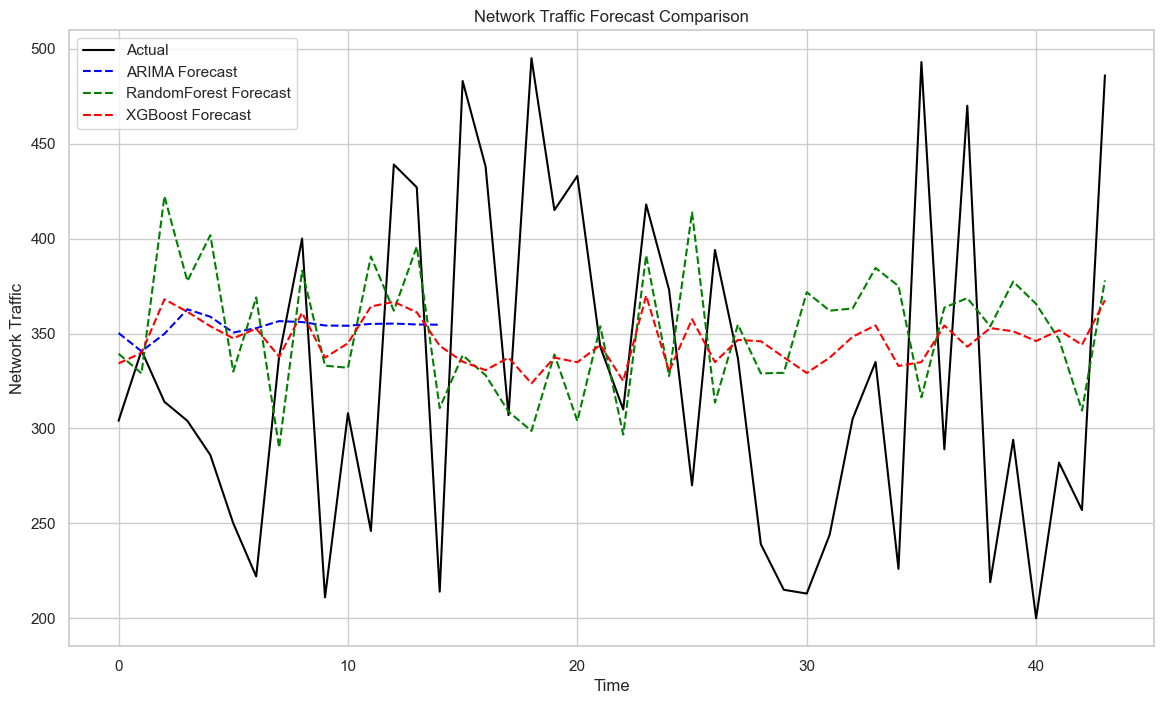

In [48]:
plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(y_test.values, label='Actual', color='black')

# Plot ARIMA forecast
plt.plot(predictions.values, label='ARIMA Forecast', linestyle='--', color='blue')

# Plot RandomForest forecast
plt.plot(rf_preds, label='RandomForest Forecast', linestyle='--', color='green')

# Plot XGBoost forecast
plt.plot(best_xgb_preds, label='XGBoost Forecast', linestyle='--', color='red')

plt.legend()
plt.title('Network Traffic Forecast Comparison')
plt.xlabel('Time')
plt.ylabel('Network Traffic')
plt.show()

ARIMA RMSE: 93.12528898084163
Random Forest RMSE: 100.69866096654188
XGBoost RMSE: 91.57844208566485


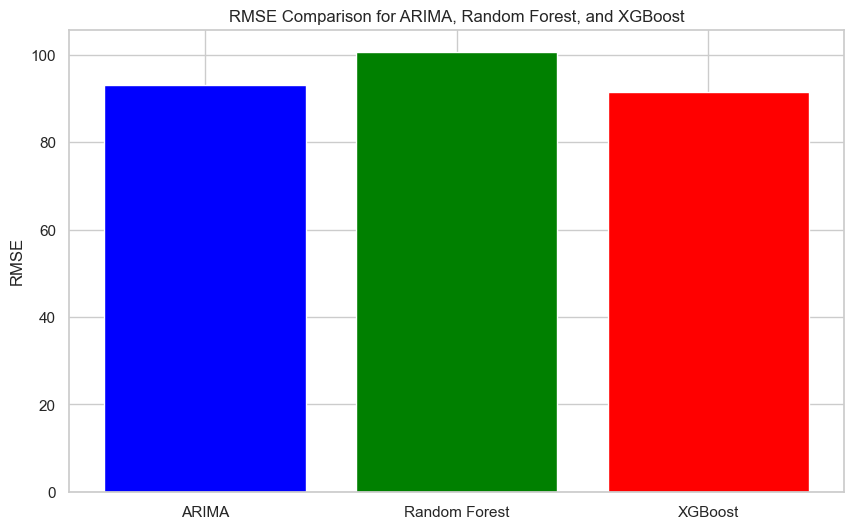

In [49]:
# Calculate RMSE for ARIMA
arima_rmse = np.sqrt(mean_squared_error(test, predictions))
xgb_rmse = np.sqrt(mean_squared_error(y_test, best_xgb_preds))

# Print RMSE for all models
print(f"ARIMA RMSE: {arima_rmse}")
print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xgb_rmse}")

# Plot RMSE comparison
models = ['ARIMA', 'Random Forest', 'XGBoost']
rmse_values = [arima_rmse, rf_rmse, xgb_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.title('RMSE Comparison for ARIMA, Random Forest, and XGBoost')
plt.ylabel('RMSE')
plt.show()

## Thank You